## Referências

* [Notebook de Valmir](https://github.com/valmyr/SystolicCore/blob/fpga/python/ConvMulti.ipynb)
* [Medium: Entendendo a diferença entre matrizes e convolução](https://aishwaryashrestha232.medium.com/understanding-the-differences-between-convolution-and-matrix-multiplication-a-guide-to-master-2d-9d1a2162cd30)
* [LearnOpenCV: Um guia completo de CNN](https://learnopencv.com/understanding-convolutional-neural-networks-cnn/)


## Importações

In [228]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from matplotlib import pyplot as plt
import cv2
import numpy as np
import random
import time

## Leitura e Vizualização de uma Imagem

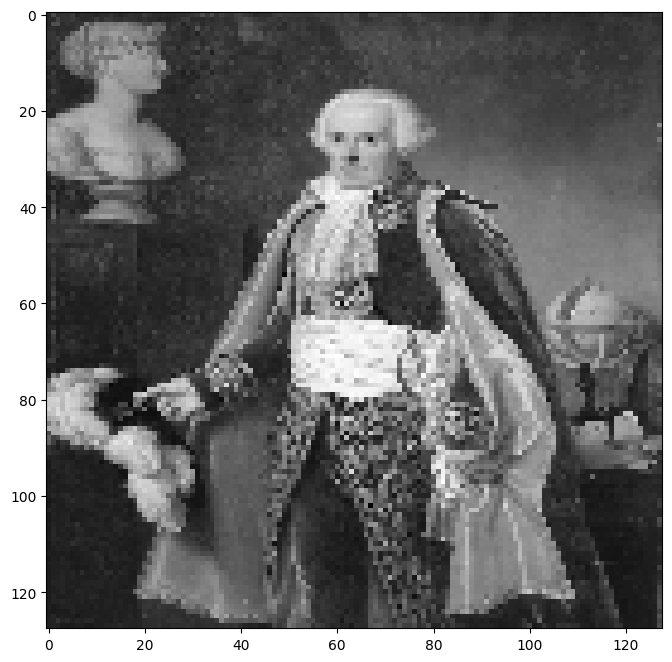

In [232]:
size = 128
path = "./images/Laplace.jpg"
gray_img = image.load_img(
  path,
  target_size=(size, size),
  color_mode="grayscale",
)

input_img = img_to_array(gray_img).reshape(size, size)

plt.figure(figsize=(8,8))
plt.imshow(input_img, cmap='gray')

## Exemplos de Kernels

In [213]:
gaussian_blur = (1/16) * np.array([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1]
])

sharpen = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])

edge_detection = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])

## Convolução com multiplicação matricial

In [214]:
def convolutionToMatrix(img, kernel):
  w_img, h_img = img.shape
  w_kernel, h_kernel = kernel.shape
  w_out = w_img - w_kernel + 1
  h_out = h_img - h_kernel + 1
  size =  h_out * w_out

  samples = []
  img_slice = []
  new_kernel = np.zeros((size, size))
  flat_kernel = kernel.flatten().tolist()

  for k in range(size):
    new_kernel[k][0] = flat_kernel[k]   

  for y in range(h_out):
    for x in range(w_out):
      img_slice.append(img[y:y+h_kernel, x:x+w_kernel].flatten().tolist())
    samples.append([img_slice, new_kernel])

  return (img_slice, new_kernel)

## Teste

In [215]:
img = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[0,1],[2,3]])
img_matrix, kernel_matrix = convolutionToMatrix(img, kernel)

print("Submatrizes da imagem")
print(np.array(img_matrix))

print("\nKernel para multiplicação matricial")
print(np.array(kernel_matrix))

print("\nResultado da multiplicação matricial")
print( np.array(img_matrix) @ np.array(kernel_matrix))

Submatrizes da imagem
[[1 2 4 5]
 [2 3 5 6]
 [4 5 7 8]
 [5 6 8 9]]

Kernel para multiplicação matricial
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [2. 0. 0. 0.]
 [3. 0. 0. 0.]]

Resultado da multiplicação matricial
[[25.  0.  0.  0.]
 [31.  0.  0.  0.]
 [43.  0.  0.  0.]
 [49.  0.  0.  0.]]


## Resultado Esperado

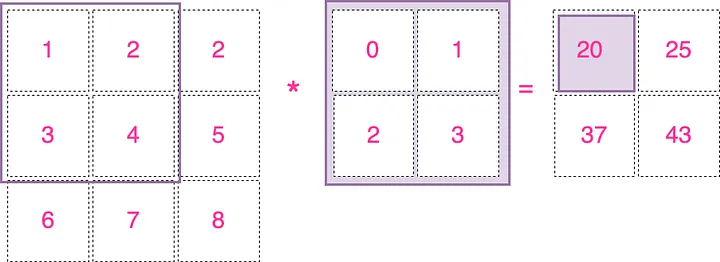